In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.special import factorial

import os, sys, inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir) 

import algorithms as a
import force_functions as f

In [37]:
zeta = 1000.
M = 1
random = False

In [38]:
N = a.metropolis_hastings(moves=int(1e6), zeta=zeta, N0=0, M=M, random=random)

  0%|          | 0/1000000 [00:00<?, ?it/s]<ipython-input-36-361d8947deb5>:26: RuntimeWarning: overflow encountered in double_scalars
  acc_prob = np.minimum(1, (factorial(N_old)*zeta**m)/factorial(N_new))
<ipython-input-36-361d8947deb5>:26: RuntimeWarning: invalid value encountered in double_scalars
  acc_prob = np.minimum(1, (factorial(N_old)*zeta**m)/factorial(N_new))
100%|██████████| 1000000/1000000 [00:22<00:00, 44472.66it/s]


In [39]:
unique, counts = np.unique(N, return_counts=True)

In [40]:
print(f'mean: {N.mean()}')
print(f'standard deviation: {N.std()}')
print(f'variance: {np.sqrt(N.std())}')

mean: 169.76544123455878
standard deviation: 1.9582459742865737
variance: 1.3993734220309366


In [41]:
p_eq = np.zeros(len(unique))
for i_n, n in enumerate(unique):
    p_eq[i_n] = zeta**n * np.e**(-zeta) / np.math.factorial(n)

<ipython-input-41-49b77ca0acc7>:3: RuntimeWarning: overflow encountered in power
  p_eq[i_n] = zeta**n * np.e**(-zeta) / np.math.factorial(n)
<ipython-input-41-49b77ca0acc7>:3: RuntimeWarning: invalid value encountered in double_scalars
  p_eq[i_n] = zeta**n * np.e**(-zeta) / np.math.factorial(n)


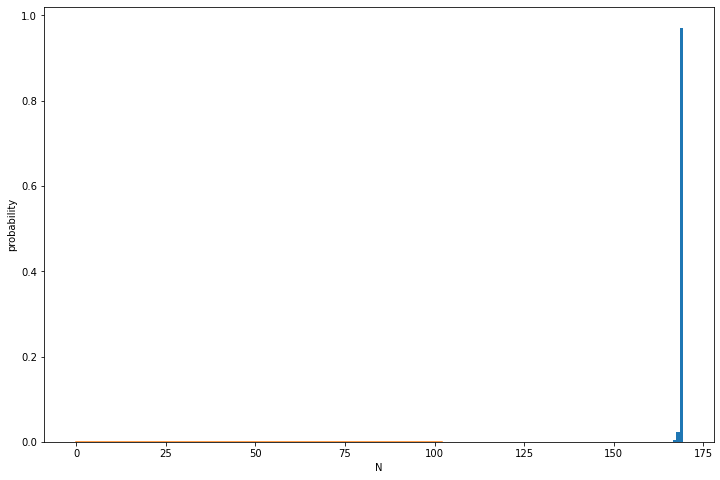

In [42]:
fig1, ax1 = plt.subplots(figsize=(12,8))
probs, _, _ = ax1.hist(N, bins=N.max(), density=True, align='left')
ax1.plot(unique, p_eq)
ax1.set_xlabel('N')
ax1.set_ylabel('probability')
#plt.savefig('./figures/N_zeta10_m1.png', dpi=300, bbox_inches='tight')
#plt.savefig('./figures/N_zeta10_m3.png', dpi=300, bbox_inches='tight')
#plt.savefig('./figures/N_zeta100_m3.png', dpi=300, bbox_inches='tight')
#plt.savefig('./figures/N_zeta10_M3.png', dpi=300, bbox_inches='tight')
#plt.savefig('./figures/N_zeta1000_M100.png', dpi=300, bbox_inches='tight')
plt.show()

In [47]:
N, count = a.poisson(int(1e6), zeta=10)

100%|██████████| 1000000/1000000 [00:19<00:00, 50674.39it/s]


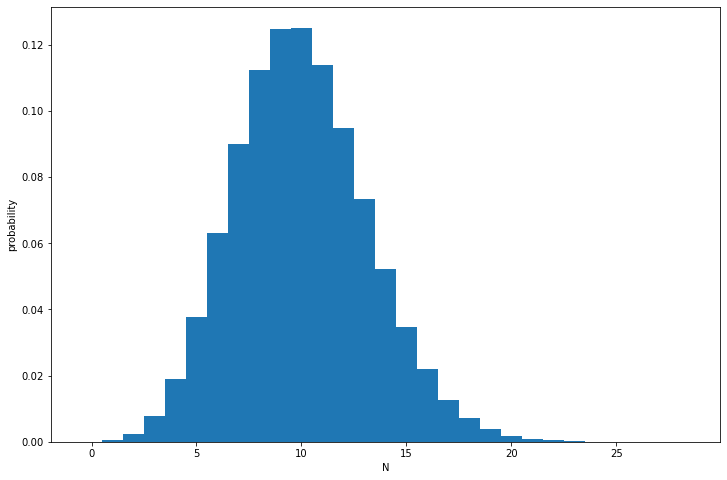

In [48]:
fig2, ax2 = plt.subplots(figsize=(12,8))
ax2.hist(N, bins=int(N.max()), density=True, align='left');
ax2.set_xlabel('N')
ax2.set_ylabel('probability')
plt.savefig('./figures/poisson_zeta10.png', dpi=300, bbox_inches='tight')
plt.show()

In [45]:
count.mean()

746.400314